# Applications of FT to Diffraction Patterns



For a function f(x), the Fourier tranform F{f(x)} or F(k) is given by:

$$ F(k) = \int_{-\infty}^{\infty} f(x) e^{i kx} dx $$

And the Inverse Fourier transform is given by:

$$ f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(k) e^{-i kx} dk$$



The far-field diffraction pattern can be represented by the Fourier transform:

$$F(k_x) = \int_{-\infty}^{\infty} f(x) e^{i k_x x} \, dx$$

### Angle-Dependent Modification

By introducing the angle dependence, we replace $k_x$ with $k \sin(\theta)$:

$$F(k \sin(\theta)) = \int_{-\infty}^{\infty} f(x) e^{i k \sin(\theta) x} \, dx$$

- $k = \frac{2\pi}{\lambda}$, where $\lambda$ is the wavelength
- $\sin(\theta)$ represents the projection of the wave vector

- The exponential term $e^{i k \sin(\theta) x}$ describes the phase variation
- Changing $\theta$ modifies the spatial frequency of the diffraction pattern


## Single Slit Diffraction by Fourier Transform

![Single Slit Fruanhofer Diffraction](fig1.png)

Let AB be a slit of width a, on which a plane wavefront of light is incident. O is the centre of the slit. In case of a fraunhofer diffraction, the source and the screen are both infinitely apart with respect to the slit. 

Consider the distance between the slit and the screen to be $D$. Therefore $D>>a$

Let $dy$ be a line element of the slit, distant y from O. 

Let $C/a$ be the amplitude of vibration of secondary source particle at the origin O. 

Then vibration of the secondary sources at all points on the slit can be written as:
$$ \phi = \frac{C}{a} e^{i\omega t} \tag{1}$$ 

Displacement at $P$ distant $r_1$ from source due to $dy$ is: 

$$ d\phi_p = \frac{C}{ar_1}e^{i(\omega t - k r_1)} \tag{2}$$ 

Now if $r$ is the distance of P from centre O, 

$$ d\phi_p = \frac{C}{ar - ay sin(\theta)} e^{i(wt - kr)}e^{ikysin(\theta)} dy $$

Now $y$ and $sin\theta$ both being small, we can write this as:

$$ d\phi_p = \frac{C}{ar} e^{i(wt - kr)}e^{ikysin(\theta)} dy \tag{3}$$

$$ or,  d\phi_p = C' e^{ikysin(\theta)} dy \tag{4}$$

$$ where, C' = \frac{C}{ar} e^{i(wt - kr)} \tag{5}$$ 

Note that for small angle diffraction, $r \simeq D$

Thus, total displacement $\phi_p$ is:

$$ \phi_p = C' \int_\frac{-a}{2}^\frac{a}{2} e^{ikysin(\theta)} dy \tag{6} $$

$$ or, \phi_p   = C' \int_{-\infty}^{\infty} e^{ikysin(\theta)} s(y) dy \tag{7}$$

where, $s(y$)   is a slit function defined as: 

$$ s(y) = \begin{cases} 1, & |x| \leq \frac{a}{2} \\0, & \text{otherwise}\end{cases}
$$

Therefore, Equation 7 shows that $\phi_p$ is the fourier transform of slit function $s(y)$, $\phi_p$ being called the displacement function

Amplitude function, $$ \delta =  \int_{-\infty}^{\infty} e^{ikysin(\theta)} s(y) dy \tag{8}$$

So, the Amplitude function can now be called the Fourier Transform of $s(y)$.

$$ \delta = \int_\frac{-a}{2}^\frac{a}{2} e^{ikysin(\theta)} (1) dy $$

$$ or, \delta = \left[ \frac{e^{ikysin(\theta)}}{iksin(\theta)}\right]_{\frac{-a}{2}}^{\frac{a}{2}}$$

$$ or, \delta = \frac{2}{k sin (\theta)} \left[ \frac{ e^ {ik\frac{a}{2}sin(\theta)} - e^{-ik\frac{a}{2}sin(\theta)}}{2i} \right] $$

$$ or, \delta = \frac{2}{k sin (\theta)} sin (k\frac{a}{2}sin(\theta)) $$

since   $  k = \frac{2\pi}{\lambda}$

$$ \delta = 2 \frac{sin(\frac{\pi a sin (\theta)}{\lambda})}{\frac{2 \pi sin (\theta)}{\lambda}}$$

$$ or, \delta = a \frac{sin(\frac{\pi a sin (\theta)}{\lambda})}{\frac{a \pi sin (\theta)}{\lambda}} \tag{9}$$ 

Let, $$ \alpha = \frac{\pi a sin (\theta)}{\lambda} $$

Thus, from equation 8,

$$  \delta = a\frac{ sin (\alpha)}{\alpha} \tag{10}$$

We know, 

$$ \phi_p = C' \delta $$

$$ or, \phi_p = \frac{C}{r} e^{i(\omega t - kr)} \frac{sin (\alpha)}{\alpha} \tag{11}$$

Therefore, Intensity is:

$$ I =  \phi_p \phi_p^* $$

$$ or, I = \frac{C^2}{r^2} (\frac{sin(\alpha)}{\alpha})^2 $$

$$ or, I = I_0 (\frac{sin(\alpha)}{\alpha})^2 \tag{12}$$

## Simulations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

In [4]:
def plot_diffraction(aperture, title):
    fft_aperture = fftshift(fft2(aperture))
    intensity = np.abs(fft_aperture)**2
    central_intensity = intensity[128, :]  

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(aperture, cmap='gray')
    plt.title(f"{title} Aperture")

    plt.subplot(1, 3, 2)
    img = plt.imshow(np.log1p(intensity), cmap='inferno')
    plt.title(f"{title} Diffraction Pattern")

    plt.subplot(1, 3, 3)
    plt.plot(central_intensity, color='red')
    plt.title(f"{title} Intensity Profile")

    plt.tight_layout()
    plt.show()

### Single Slit Diffraction Pattern

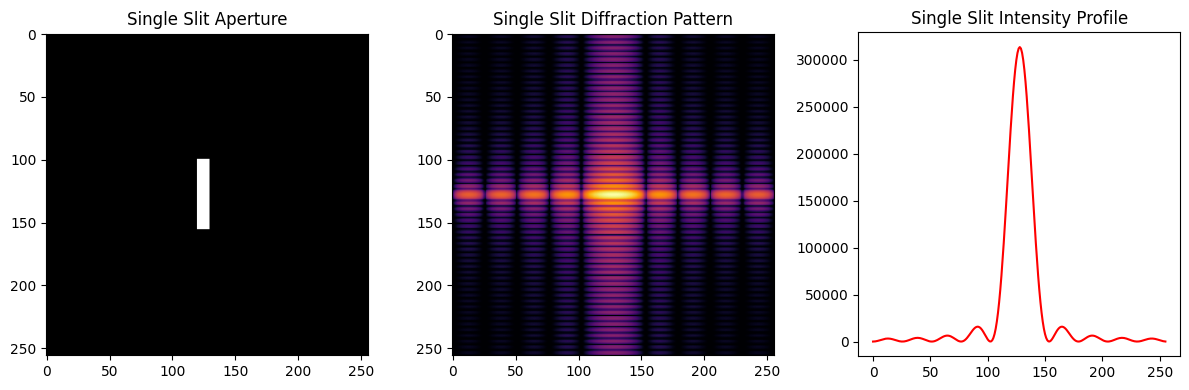

In [5]:
def single_slit():
    aperture = np.zeros((256, 256))
    aperture[100:156, 120:130] = 1  
    plot_diffraction(aperture, "Single Slit")
single_slit()

## Other Diffraction Patterns:

- **Double-Slit & Multi-Slit:** The aperture function is modified to include multiple slits. 
- **Rectangular Aperture:** A 2D extension of the single slit, producing a sinc function in both x and y directions.  
- **Circular Aperture:** The diffraction pattern follows an Airy disk, arising from the Fourier transform of a circular function.  
- **Hexagonal & Other Shapes:** More complex patterns emerge, depending on the symmetry of the aperture function.  


### Double Slit Diffraction Pattern

Here the aperture function is modified to include 2 slits.

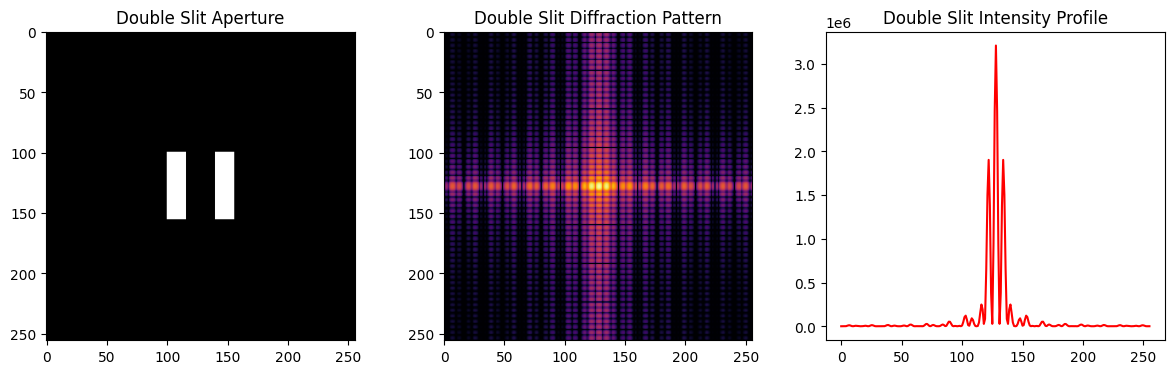

In [6]:
def double_slit():
    aperture = np.zeros((256, 256))
    aperture[100:156, 100:116] = 1  
    aperture[100:156, 140:156] = 1  
    plot_diffraction(aperture, "Double Slit")
double_slit()


### N-slit Grating or Diffraction Grating

Multiple slits are included in the aperture function. 

For any number of N, we can observe the diffraction pattern.

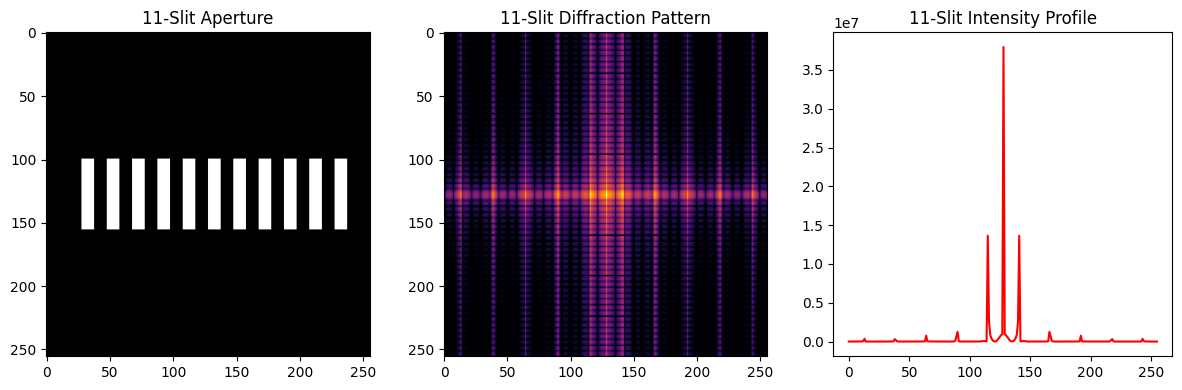

In [78]:
def n_slit(N, slit_width=10, slit_spacing=20):
    aperture = np.zeros((256, 256))
    center_x = aperture.shape[1] // 2  
    total_width = (N - 1) * slit_spacing  
    start_x = center_x - total_width // 2  
    for i in range(N):
        x_start = start_x + i * slit_spacing
        aperture[100:156, x_start:x_start + slit_width] = 1  
    plot_diffraction(aperture, f"{N}-Slit")
n_slit(N=11)



 For N = 1 and N = 2, single and double slit diffraction patterns are observed.

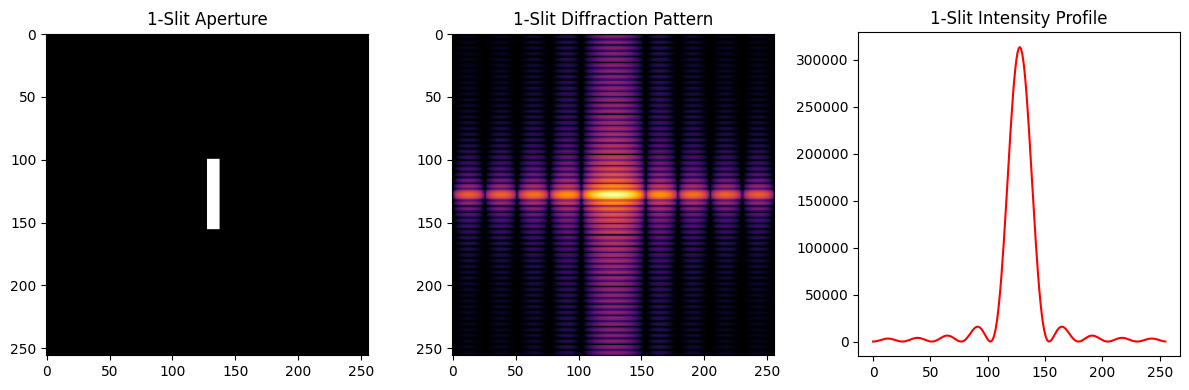

In [83]:
def n_slit(N, slit_width=10, slit_spacing=20):
    aperture = np.zeros((256, 256))
    center_x = aperture.shape[1] // 2  
    total_width = (N - 1) * slit_spacing  
    start_x = center_x - total_width // 2  
    for i in range(N):
        x_start = start_x + i * slit_spacing
        aperture[100:156, x_start:x_start + slit_width] = 1  
    plot_diffraction(aperture, f"{N}-Slit")
n_slit(N=1)

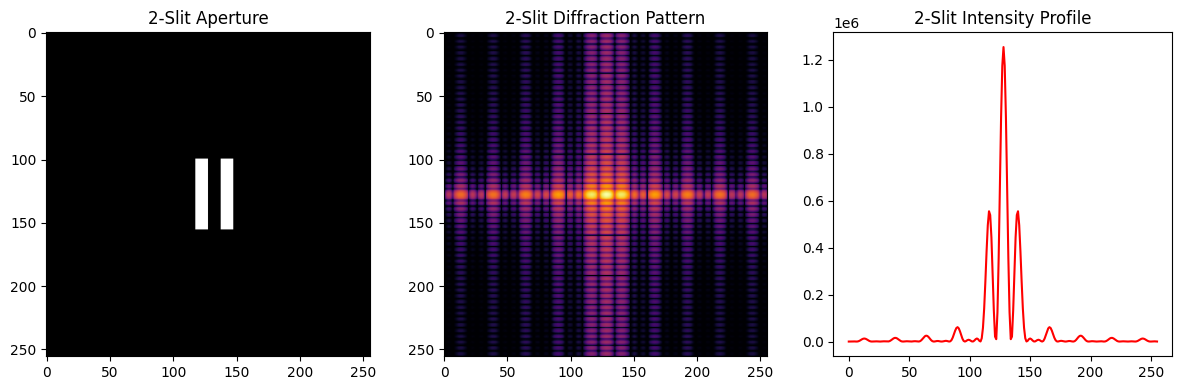

In [82]:
def n_slit(N, slit_width=10, slit_spacing=20):
    aperture = np.zeros((256, 256))
    center_x = aperture.shape[1] // 2  
    total_width = (N - 1) * slit_spacing  
    start_x = center_x - total_width // 2  
    for i in range(N):
        x_start = start_x + i * slit_spacing
        aperture[100:156, x_start:x_start + slit_width] = 1  
    plot_diffraction(aperture, f"{N}-Slit")
n_slit(N=2)

### Circular Aperture

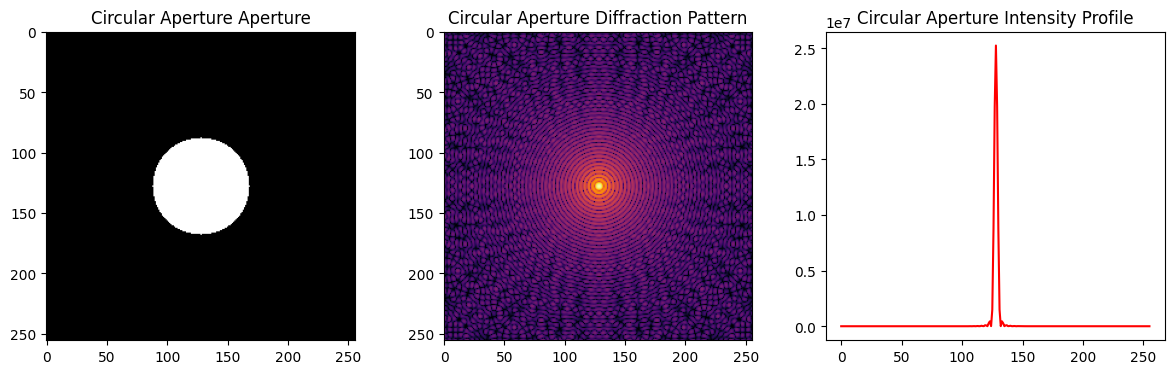

In [85]:
def circular_aperture(radius=40):
    aperture = np.zeros((256, 256))
    x, y = np.meshgrid(np.arange(256), np.arange(256))
    cx, cy = 128, 128  # Center
    aperture[(x - cx) ** 2 + (y - cy) ** 2 <= radius ** 2] = 1
    plot_diffraction(aperture, "Circular Aperture")
circular_aperture()


### Rectangular Aperture

An extension of the single slit, which is a tall and narrow rectangle.

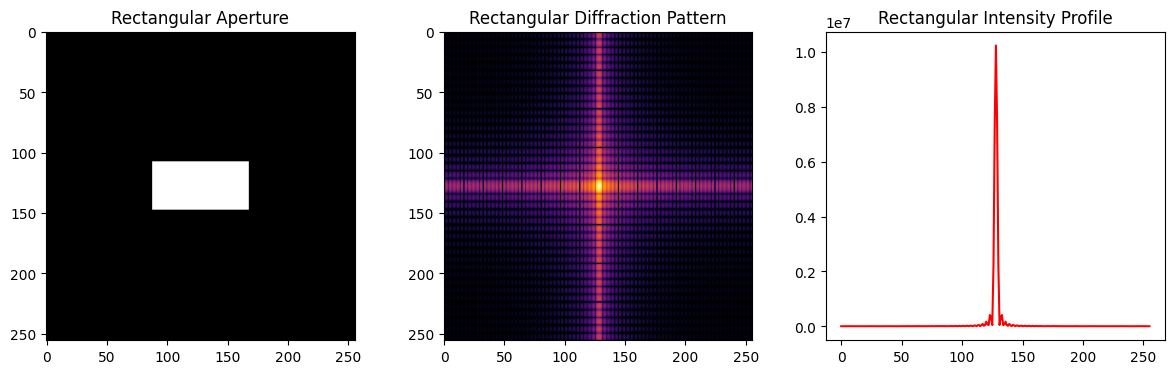

In [84]:
def rectangular_aperture(width=80, height=40):
    aperture = np.zeros((256, 256))
    x_start, y_start = 128 - height // 2, 128 - width // 2
    aperture[x_start:x_start + height, y_start:y_start + width] = 1
    plot_diffraction(aperture, "Rectangular")
rectangular_aperture()


### Diffraction from Arbitrary Apertures:

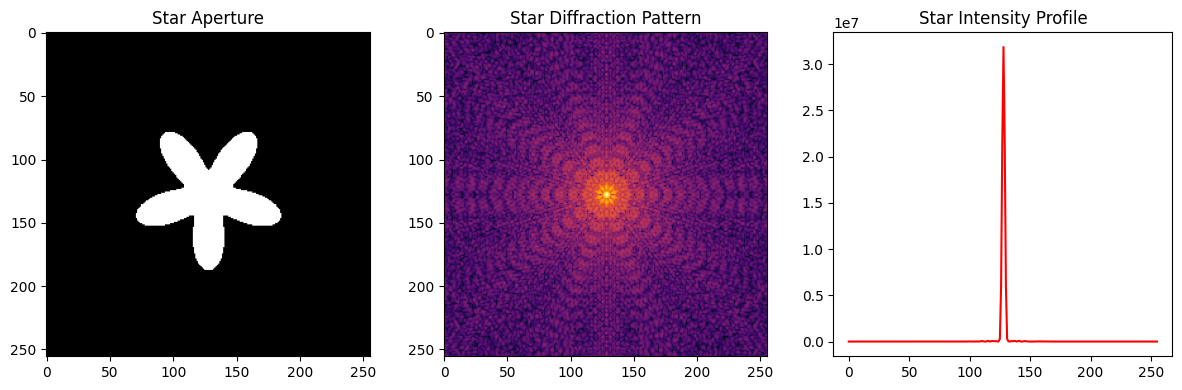

In [86]:
def star_aperture(size=40, spikes=5):
    aperture = np.zeros((256, 256))
    x, y = np.meshgrid(np.arange(256) - 128, np.arange(256) - 128)
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    aperture[r < (size + size * 0.5 * np.sin(spikes * theta))] = 1
    plot_diffraction(aperture, "Star")
star_aperture()


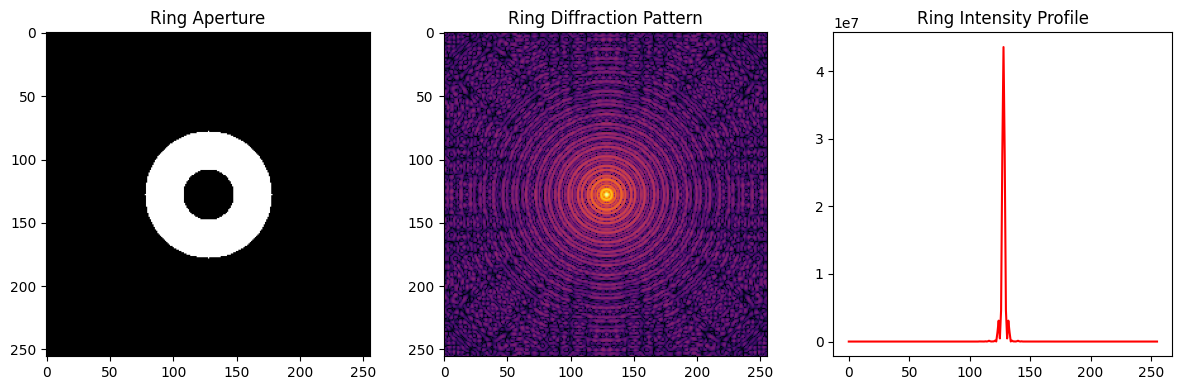

In [87]:
def ring_aperture(inner_radius=20, outer_radius=50):
    aperture = np.zeros((256, 256))
    x, y = np.meshgrid(np.arange(256), np.arange(256))
    cx, cy = 128, 128
    r = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
    aperture[(r >= inner_radius) & (r <= outer_radius)] = 1
    plot_diffraction(aperture, "Ring")
ring_aperture()
